
# INTRODUCTION
### Title: Divvy Bike Share 

### Author: Edline Dallal

### Date: 13/11/2022

## STEP 1: ASK
#### Case Study Question? 
- #### How Does a Bike-Share Navigate Speedy Success?
#### 1.2 Business Task:
Analyze Divvy dataset to gain insights into how consumers are using bicycles and discover trends and insights for Divvy Share marketing strategy.
#### 1.3 Business Objectives:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?


## STEP 2: PREPARE
#### 2.1 Information on Data Source:
- The dataset is the Cyclistic’s (Divvy) historical trip data from 2021. It comprises a total of 12 files, one per month.
- Data source: https://divvy-tripdata.s3.amazonaws.com/index.html

#### 2.2 Data Selection:
The following files were selected and merged for analysis into one dataset: 
    
- 202101-divvy-tripdata.csv
- 202102-divvy-tripdata.csv
- 202103-divvy-tripdata.csv
- 202104-divvy-tripdata.csv
- 202105-divvy-tripdata.csv
- 202106-divvy-tripdata.csv
- 202107-divvy-tripdata.csv
- 202108-divvy-tripdata.csv
- 202109-divvy-tripdata.csv
- 202110-divvy-tripdata.csv
- 202111-divvy-tripdata.csv
- 202112-divvy-tripdata.csv

## STEP 3: PROCESS
#### 3.1 Preparing the Environment
install numPy, pandas, matplotlib, datetime, calendar and seaborn packages

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import calendar

In [2]:
# read_csv function to read the required CSV file
m1 = pd.read_csv('202101-divvy-tripdata.csv')
m2 = pd.read_csv('202102-divvy-tripdata.csv')
m3 = pd.read_csv('202103-divvy-tripdata.csv')
m4 = pd.read_csv('202104-divvy-tripdata.csv')
m5 = pd.read_csv('202105-divvy-tripdata.csv')
m6 = pd.read_csv('202106-divvy-tripdata.csv')
m7 = pd.read_csv('202107-divvy-tripdata.csv')
m8 = pd.read_csv('202108-divvy-tripdata.csv')
m9 = pd.read_csv('202109-divvy-tripdata.csv')
m10 = pd.read_csv('202110-divvy-tripdata.csv')
m11 = pd.read_csv('202111-divvy-tripdata.csv')
m12 = pd.read_csv('202112-divvy-tripdata.csv')

In [3]:
df = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12], ignore_index = True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [6]:
#check for null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

the columns: start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng have nulls. 
for the purpose of this analysis  these columns will be dropped, we'll analyze the only ride_id,rideable_type, member_casual, started_at, ended_at

In [7]:
#check for the shape of the dataset
df.shape

(5595063, 13)

In [8]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [9]:
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])


In [10]:
df['started_at']= pd.to_datetime(df['started_at'])
df['ended_at']= pd.to_datetime(df['ended_at'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 213.4+ MB


In [5]:
df.rideable_type.value_counts()

classic_bike     3251028
electric_bike    2031692
docked_bike       312343
Name: rideable_type, dtype: int64

The rideable types has 3 types: classic bikes, electric bikes and docked bikes. the numbers shows that classic bikes are the most popular and useful type. 

In [47]:
df.member_casual.value_counts()

member    3066058
casual    2529005
Name: member_casual, dtype: int64

In [12]:
# count distinct value of "Id"
unique_id = len(pd.unique(df["ride_id"]))
  
print("# of unique ride Id: " + str(unique_id))

# of unique ride Id: 5595063


In [13]:
df.groupby(['ride_id']).size().value_counts()

1    5595063
dtype: int64

In [14]:
# create new column "day_of_the_week" to represent day of the week 
df["trip_day"] = df["started_at"].dt.day_name()

In [15]:
#Make new column of month name
df['month'] = pd.DatetimeIndex(df['started_at']).month
df['month_name'] = df["started_at"].dt.month_name()

In [16]:
#create Trip Duration column
df['trip_duration']= df['ended_at']- df['started_at']

In [17]:
casual= df[df['member_casual']=='casual']
member= df[df['member_casual']=='member']

Data cleaning and manipulation is completed. Hence, data is now ready to be analysed. 

# STEP 4: ANALYZE

4.1 Perform calculations
Pulling the statistics of df_activity for analysis:

count - no. of rows
mean (average)
std (standard deviation)
min and max
percentiles 25%, 50%, 75%

In [19]:
# pull general statistics
df.describe()

,month,trip_duration
count,5.595063e+06,5595063
mean,7.418277e+00,0 days 00:21:56.120689615
std,2.492260e+00,0 days 02:58:20.085105105
min,1.000000e+00,-1 days +23:01:58
25%,6.000000e+00,0 days 00:06:45
50%,8.000000e+00,0 days 00:12:00
75%,9.000000e+00,0 days 00:21:47
max,1.200000e+01,38 days 20:24:09


In [20]:
df['member_casual'].value_counts()

member    3066058
casual    2529005
Name: member_casual, dtype: int64

In [21]:
#rides on weekday: 
# For casual
count_casual_weekday=df[df['member_casual']=='casual'].groupby('trip_day')['ride_id'].count()

trip_day
Friday       364080
Monday       286376
Saturday     558000
Sunday       481143
Thursday     286064
Tuesday      274392
Wednesday    278950
Name: ride_id, dtype: int64

In [22]:
#rides on weekday: 
# For member
count_member_weekday=df[df['member_casual']=='member'].groupby('trip_day')['ride_id'].count()

trip_day
Friday       446428
Monday       416212
Saturday     433047
Sunday       376142
Thursday     451524
Tuesday      465513
Wednesday    477192
Name: ride_id, dtype: int64

In [24]:
# Number of users over month
users_over_month = df.groupby('month')['member_casual'].value_counts()

month  member_casual
1      member            78717
       casual            18117
2      member            39491
       casual            10131
3      member           144463
       casual            84033
4      member           200629
       casual           136601
5      member           274717
       casual           256916
6      casual           370681
       member           358914
7      casual           442056
       member           380354
8      casual           412671
       member           391681
9      member           392257
       casual           363890
10     member           373984
       casual           257242
11     member           253049
       casual           106929
12     member           177802
       casual            69738
Name: member_casual, dtype: int64

In [25]:
# Average ride length by weekday
user_avg_ride_len_weekday=df.groupby('trip_day')['trip_duration'].mean(numeric_only=False)

trip_day
Friday      0 days 00:20:58.300338799
Monday      0 days 00:20:50.400399665
Saturday    0 days 00:26:12.642935198
Sunday      0 days 00:27:56.953633855
Thursday    0 days 00:18:33.923176624
Tuesday     0 days 00:18:25.134849744
Wednesday   0 days 00:18:17.542444408
Name: trip_duration, dtype: timedelta64[ns]

In [26]:
# Average ride length for members by weekdays
member_avg_ride_len_weekday=df[df['member_casual']=='member'].groupby('trip_day')['trip_duration'].mean(numeric_only=False)

trip_day
Friday      0 days 00:13:19.485428781
Monday      0 days 00:13:14.836198860
Saturday    0 days 00:15:15.861204442
Sunday      0 days 00:15:39.270318124
Thursday    0 days 00:12:46.564082972
Tuesday     0 days 00:12:47.280000773
Wednesday   0 days 00:12:49.084446092
Name: trip_duration, dtype: timedelta64[ns]

In [27]:
# Average ride length for casuals by weekdays
casual_avg_ride_len_weekday=df[df['member_casual']=='casual'].groupby('trip_day')['trip_duration'].mean(numeric_only=False)

trip_day
Friday      0 days 00:30:20.890491100
Monday      0 days 00:31:52.506467022
Saturday    0 days 00:34:42.351462365
Sunday      0 days 00:37:33.650536327
Thursday    0 days 00:27:42.195477235
Tuesday     0 days 00:27:58.314185544
Wednesday   0 days 00:27:39.426398996
Name: trip_duration, dtype: timedelta64[ns]

# STEP 5: SHARE

In this step, we will create visualizations and communicate our findings based on our analysis.

### 5.1 Data Visualisation and Findings

### Histogram

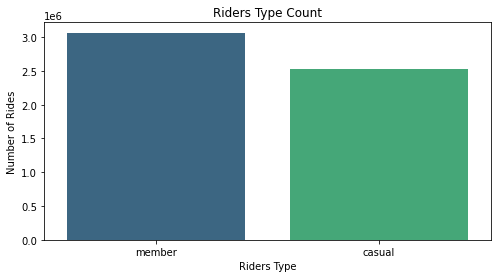

In [28]:
#plot the rider type count 
plt.figure(figsize=(8,4))
sns.countplot(data= df, x= 'member_casual', palette= 'viridis')
plt.title('Riders Type Count')
plt.xlabel('Riders Type')
plt.ylabel('Number of Rides')
plt.show()

The plot shows the total number of rides for each type of user: member and casual. 
The data indicates that there were 3,066,058 rides taken by members and 2,529,005 rides taken by casual users.

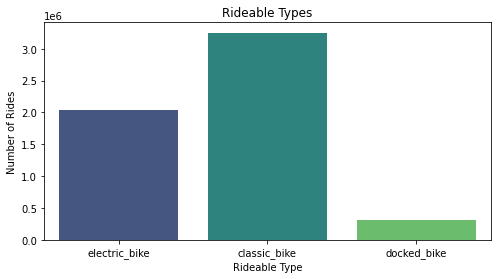

In [29]:
#plot the rideable_type count 
# create a bar chart of the most popular rideable types
plt.figure(figsize=(8,4))
sns.countplot(data= df, x='rideable_type',palette= 'viridis' )
plt.title('Rideable Types')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.show()

The plot shows the number of rides taken by rideable types (classic, electric and docked). classic bikes are the most popular type of bike with a total count of 3251028. Electric bikes come second with a total count of 2031692, and docked bikes have the lowest count with 312343.

/Users/edlinedallal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


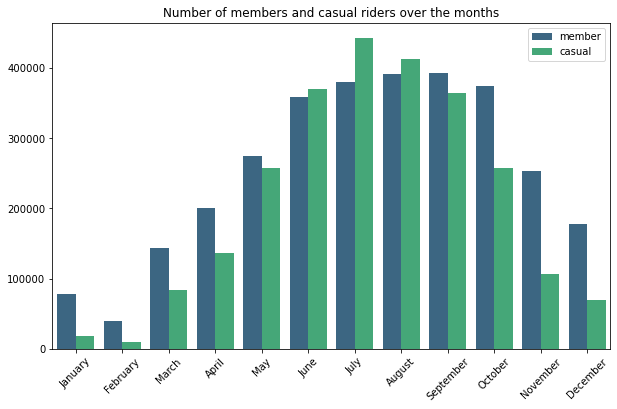

In [30]:
# To segregate the number of users into member or casual riders over months
import calendar
list_month=[]
list_x=[]
list_y=list(users_over_month.values)
for i,j in users_over_month.index:
    month_name = calendar.month_name[i] # get the name of the month
    list_x.append(j)
    list_month.append(str(month_name))
# Plot count of member and casual riders over the months  option 1: 
plt.figure(figsize=(10,6))
sns.barplot(list_month, list_y, hue=list_x, palette = 'viridis' )
plt.title('Number of members and casual riders over the months')
plt.xticks(rotation= 45)
plt.show()

This plot shows the number of bike rentals by user type (member or casual) for each month across the year (Janurary- December). It appears that overall, the number of rentals is higher for members than for casual users. However, there is a notable spike in casual user rentals during the summer months (June-August) compared to other months that's could be due to the fact that casual riders may be tourists that uses the bikes mostly in the hot season, hence July and August, while the number of member rentals remains relatively stable throughout the year.





### Duration 

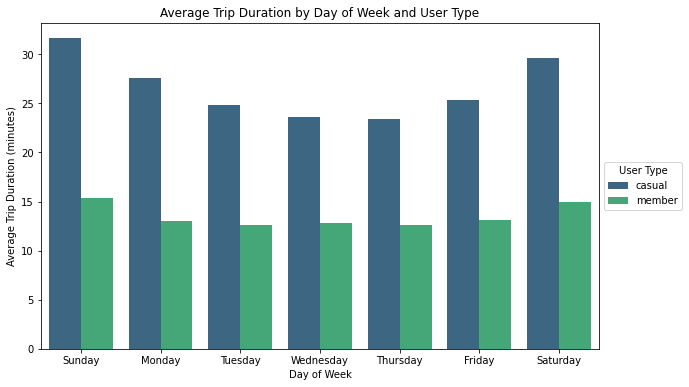

In [43]:
# group data by day of week and user type, and calculate mean trip duration
duration_week = df.groupby(['trip_day', 'member_casual'])['trip_duration'].mean().reset_index()

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# set the bar width
bar_width = 0.35

# convert categorical variable to integers
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
duration_week['day_int'] = duration_week['trip_day'].cat.reorder_categories(day_order).cat.codes

# plot the bars for members and casuals
sns.barplot(x='day_int', y='trip_duration', hue='member_casual', data=duration_week, palette='viridis', ax=ax)

# set the title, x and y labels, and legend
ax.set_title('Average Trip Duration by Day of Week and User Type')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Trip Duration (minutes)')
ax.legend(title='User Type', loc='center left', bbox_to_anchor=(1.0, 0.5))

# set the x ticks and labels
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)

# show the plot
plt.show()

The plot shows the average trip duration by day of the week for casual riders and member riders. 
- Casual:<br> 
According to the data, Sunday has the longest average trip duration at 37 minutes and 33 seconds, while Wednesday has the shortest average trip duration at 27 minutes and 39 seconds. The other days fall in between these two extremes.
- Member: <br>
According to the data, the shortest average trip durations occur on Tuesday, Wednesday, and Thursday, while the longest average trip durations occur on Sunday and Saturday.

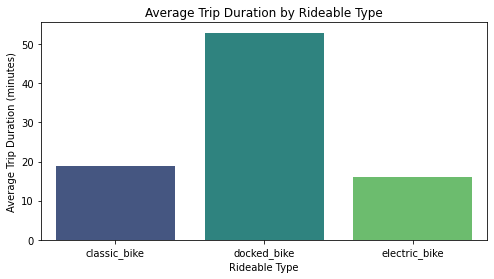

In [44]:
# calculate trip duration in minutes
df['trip_duration'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.seconds / 60

# group data by rideable type and calculate the average trip duration
rideable_duration = df.groupby('rideable_type')['trip_duration'].mean().reset_index()

# plot bar chart of average trip duration by rideable type
plt.figure(figsize=(8,4))
sns.barplot(data=rideable_duration, x='rideable_type', y='trip_duration', palette='viridis')
plt.xlabel('Rideable Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Rideable Type')
plt.show()

Based on plot, we can see that the average trip duration varies by rideable type. Docked bikes have the longest average trip duration at 52.9 minutes, while electric bikes have the shortest at 16.1 minutes. Classic bikes have an average trip duration of 18.8 minutes. This suggests that riders may choose different types of bikes depending on the purpose of their trip or their preferred riding experience.

#### Usage 

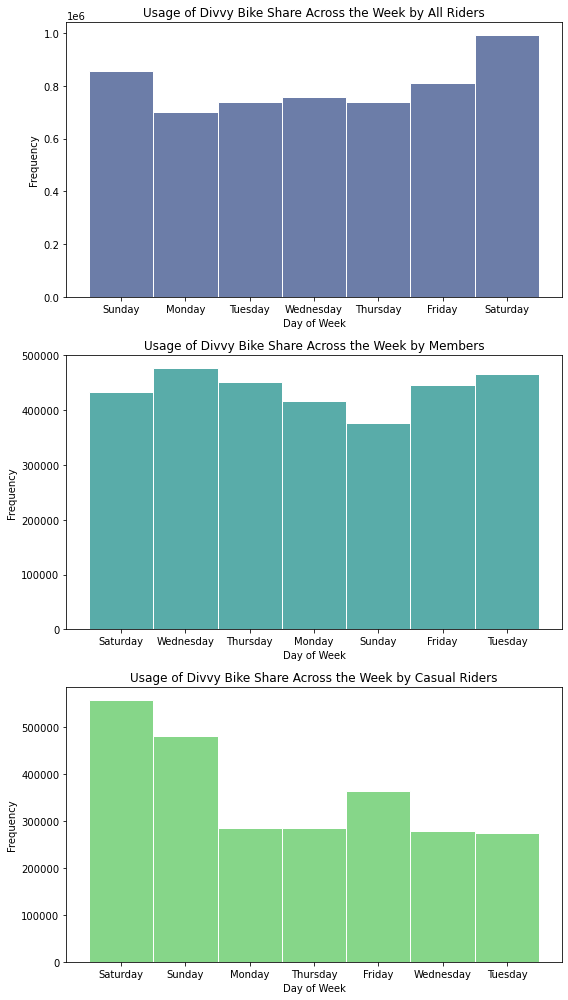

In [34]:
# create a categorical column for day of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['trip_day'] = pd.Categorical(df['trip_day'], categories=day_order, ordered=True)

# create subplots for all three histograms
fig, axs = plt.subplots(3, figsize=(8,14))

# create a histogram of total riders across the week
sns.histplot(ax=axs[0], data=df, x='trip_day', binwidth=2, bins=7, color=sns.color_palette('viridis', 3)[0] , edgecolor='white')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Usage of Divvy Bike Share Across the Week by All Riders')
axs[0].grid(False)

# create a histogram of member riders across the week
sns.histplot(ax=axs[1], data=member, x='trip_day', binwidth=2, bins=7, color=sns.color_palette('viridis', 3)[1], edgecolor='white')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Usage of Divvy Bike Share Across the Week by Members')
axs[1].grid(False)

# create a histogram of casual riders across the week
sns.histplot(ax=axs[2], data=casual, x='trip_day', binwidth=2, bins=7, color=sns.color_palette('viridis', 3)[2], edgecolor='white')
axs[2].set_xlabel('Day of Week')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Usage of Divvy Bike Share Across the Week by Casual Riders')
axs[2].grid(False)

# adjust spacing and display the plots
fig.tight_layout()
plt.savefig('1.png')

plt.show()


- First plot: All riders:  <br> 
Based on the first plot, it appears that Saturdays are the most popular day for bike rentals with a total count of 991,047 rides, followed closely by Sundays with 857,285 rides. Fridays are the third most popular day with 810,508 rides. The remaining weekdays fall in the range of 702,588 to 756,142 rides, with Wednesdays having the highest count among them.

- Second plot : Members: <br> 
Based on the second plot, it appers that the highest number of occurrences were recorded on Wednesday (477,192) and the lowest on Sunday (376,142). Looking at the data, it seems like the number of occurrences decreases from Wednesday to Sunday. This pattern is consistent with the fact that Wednesday and Thursday are typically considered the busiest days of the week, while Saturday and Sunday are often regarded as the weekend when fewer people engage in work-related activities.

- Third plot :<br>
Based on the second plot, it appers that the highest number of occurrences were recorded on Saturday (558,000) and the lowest on Tuesday (274,392).Unlike the previous data, this data shows a different pattern of occurrences throughout the week. The number of occurrences starts high on Saturday and gradually decreases towards Tuesday. This pattern is related to the fact that the riders are casual riders. 

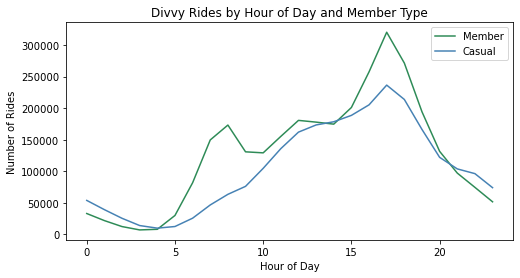

In [45]:
# convert started_at column to datetime format and extract hour information
df['started_at'] = pd.to_datetime(df['started_at'])
df['hour'] = df['started_at'].dt.hour

# create a pivot table with the count of rides by hour of day and member type
pivot_table = df.pivot_table(values='ride_id', index='hour', columns='member_casual', aggfunc='count')

# create a line chart to show the usage by hour of day by members and casuals
plt.figure(figsize=(8,4))
plt.plot(pivot_table['member'], label='Member', color= 'seagreen')
plt.plot(pivot_table['casual'], label='Casual', color= 'steelblue')
plt.title('Divvy Rides by Hour of Day and Member Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

Tle plot represents the  rides by hour of day and member Type
- Casual: <br>
The plot shows the usage hour of the day by casual riders. 
We can see that the highest number of rides occur during the late afternoon/early evening hours, with 17:00 being the peak hour with 236,548 rides. This trend is expected as it corresponds with the end of typical work hours and the start of leisure time for most people.

- member: <br>
The plot shows the usage hour of the day by members. it appears that the peak usage hours are between 5 PM and 8 PM (17-19), with a total of 785,007 members using the service during these hours. The morning hours between 8 AM and 11 AM (8-10) also show a high usage rate, with a total of 459,811 members.


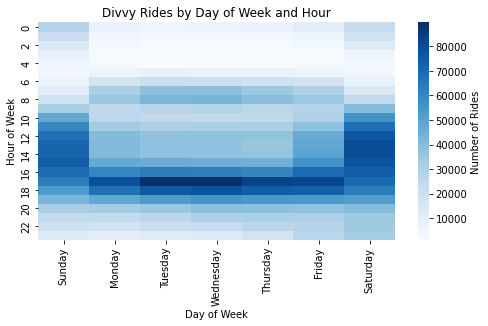

In [52]:
# convert started_at column to datetime format and extract hour and day of week information
df['started_at'] = pd.to_datetime(df['started_at'])
df['hour'] = df['started_at'].dt.hour

# create a heatmap of ride start times by hour and day of week
pivot_table = df.pivot_table(values='ride_id', index='hour', columns='trip_day', aggfunc='count')
plt.figure(figsize=(8,4))
sns.heatmap(pivot_table,  xticklabels=day_order,  cmap='Blues', annot=False, cbar_kws={'label': 'Number of Rides'})
plt.title('Divvy Rides by Day of Week and Hour')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Week')
plt.show()

This heatmap plot presents the number of rides during different hours of the day and days of the week. the plot shows that:

- The number of rides is generally higher during the day than at night.
- There is a peak in rides during the morning rush hour (7am-9am) and the evening rush hour (4pm-6pm) specialy from monday till friday.
- There is a dip in rides during the late night/early morning hours (12am-6am).
- Weekdays have more rides than weekends.
- There is a difference in the rides between weekends and weekdays, on weekends the rides are along all day, while on weekdays the high numbers of rides are during morning rush hours or evening rush hours.

### Conclustion: 

The analysis includes several plots that provide insights into the usage patterns of a bike-sharing service. The first plot shows the total number of rides by user type (member or casual) and rideable type (classic, electric, and docked). It reveals that members took more rides than casual users, and classic bikes were the most popular rideable type.

The second plot shows the number of rentals by user type for each month across the year. It indicates that casual users rented more bikes during the summer months, while member rentals remained relatively stable throughout the year.

The third plot shows the monthly bike rental count for two user types, members and casual users, over a year. Members rent more bikes than casual users overall, but there is a significant increase in casual user rentals during summer months, potentially due to tourism. In contrast, member rentals remain constant throughout the year.

The fourth plot shows the average trip duration by day of the week for both member and casual riders. The data indicates that Sunday has the longest average trip duration for casual riders, while Sunday and Saturday have the longest average trip duration for member riders.

The fifth plot shows the number of rides by day of the week. Saturdays are the most popular day for bike rentals, followed by Sundays and Fridays.

The sixth plot shows the usage hour of the day by casual and member riders. The data shows that both casual and member riders use the service the most during the late afternoon/early evening hours, with 17:00 being the peak hour.

Finally, the heatmap plot shows the number of rides during different hours of the day and days of the week. It reveals that the number of rides is generally higher during the day than at night, with peaks during the morning and evening rush hours. Weekdays have more rides than weekends, and the busiest day of the week is typically Wednesday or Thursday.



### Recommendations:

1) Increase the availability of classic bikes: As the most popular rideable type, it may be beneficial to increase the number of classic bikes available for rental to meet the high demand.

2) Target casual riders during the summer months: Since casual ridership tends to spike during the summer months, it may be worth targeting marketing efforts towards tourists and other casual riders during this time.

3) Consider offering discounts for off-peak hours: To encourage ridership during non-peak hours, offering discounts or promotions during these times may be an effective strategy.

4) Expand availability of electric bikes: While electric bikes have a lower usage rate compared to classic bikes, they still have a considerable number of rentals. Expanding the availability of electric bikes may attract more riders who prefer this type of rideable.

5) Increase marketing efforts during weekdays to attract more riders during slower periods.